# Proyek Analisis Data: PRSA_Data_Aotizhongxin_20130301-20170228
- **Nama:** Bagus Dzakiy Rahman Saputra
- **Email:** bagusdzakiy19@gmail.com
- **ID Dicoding:** jakiik

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi konsentrasi PM2.5 seiring waktu di daerah Aotizhongxin?
- Apa faktor cuaca yang paling berpengaruh terhadap konsentrasi polusi udara, khususnya PM2.5?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)

In [43]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Menentukan file path csv yang akan kita analisis datanya
- load data csv yang kita sudah tentukan pathnya

### Assessing Data

In [24]:
descriptive_stats = data.describe()

**Insight:**
- xxx
- xxx

### Cleaning Data

In [49]:
data_new_filled = data.copy()

In [51]:
numerical_columns_new = data.select_dtypes(include=['float64', 'int64']).columns

In [52]:
data_new_filled[numerical_columns_new] = data_new_filled[numerical_columns_new].fillna(data_new_filled[numerical_columns_new].median())

In [53]:
valid_co_range_new = (100, 5000)
valid_pm25_range_new = (0, 300)
valid_pm10_range_new = (0, 300)
valid_so2_range_new = (0, 150)
valid_no2_range_new = (0, 200)
valid_o3_range_new = (0, 200)
valid_temp_range_new = (-20, 50)
valid_dewp_range_new = (-40, 30)

In [54]:
data_new_cleaned = data_new_filled[
    (data_new_filled['CO'].between(valid_co_range_new[0], valid_co_range_new[1])) &
    (data_new_filled['PM2.5'].between(valid_pm25_range_new[0], valid_pm25_range_new[1])) &
    (data_new_filled['PM10'].between(valid_pm10_range_new[0], valid_pm10_range_new[1])) &
    (data_new_filled['SO2'].between(valid_so2_range_new[0], valid_so2_range_new[1])) &
    (data_new_filled['NO2'].between(valid_no2_range_new[0], valid_no2_range_new[1])) &
    (data_new_filled['O3'].between(valid_o3_range_new[0], valid_o3_range_new[1])) &
    (data_new_filled['TEMP'].between(valid_temp_range_new[0], valid_temp_range_new[1])) &
    (data_new_filled['DEWP'].between(valid_dewp_range_new[0], valid_dewp_range_new[1]))
]

In [55]:
missing_values_after_cleaning = data_new_cleaned.isna().sum()

In [56]:
missing_values_after_cleaning

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [58]:
unique_wd_values = data['wd'].unique()
print(unique_wd_values)

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


In [59]:
valid_wd_values = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'NNE', 'ENE', 'SSW', 'WSW', 'WNW', 'SSE', 'ESE']

In [61]:
invalid_wd_values = data[~data['wd'].isin(valid_wd_values)]

In [62]:
print(invalid_wd_values)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   73.0   
7          8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0   43.0   
8          9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0   45.0   
10        11  2013      3    1    10    3.0   6.0   9.0  12.0  400.0   72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...    ...   
35046  35047  2017      2   28     6    9.0  16.0  17.0  34.0  500.0   73.0   
35050  35051  2017      2   28    10   11.0  16.0   6.0  24.0  300.0   93.0   
35053  35054  2017      2   28    13    6.0   8.0   3.0   9.0  100.0  115.0   
35055  35056  2017      2   28    15    6.0  19.0   4.0   8.0  100.0  122.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0   35.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       st

In [65]:
data_new_cleaned['wd'] = data['wd'].apply(lambda x: x if x in valid_wd_values else 'N')

<ipython-input-65-70f9286c10cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_cleaned['wd'] = data['wd'].apply(lambda x: x if x in valid_wd_values else 'N')


In [66]:
most_frequent_wd_new = data_new_cleaned['wd'].mode()[0]

In [68]:
data_new_cleaned['wd'] = data['wd'].fillna(most_frequent_wd_new)

<ipython-input-68-1efa9ad73de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_cleaned['wd'] = data['wd'].fillna(most_frequent_wd_new)


In [70]:
missing_values_after_cleaning = data_new_cleaned.isna().sum()

In [71]:
missing_values_after_cleaning

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

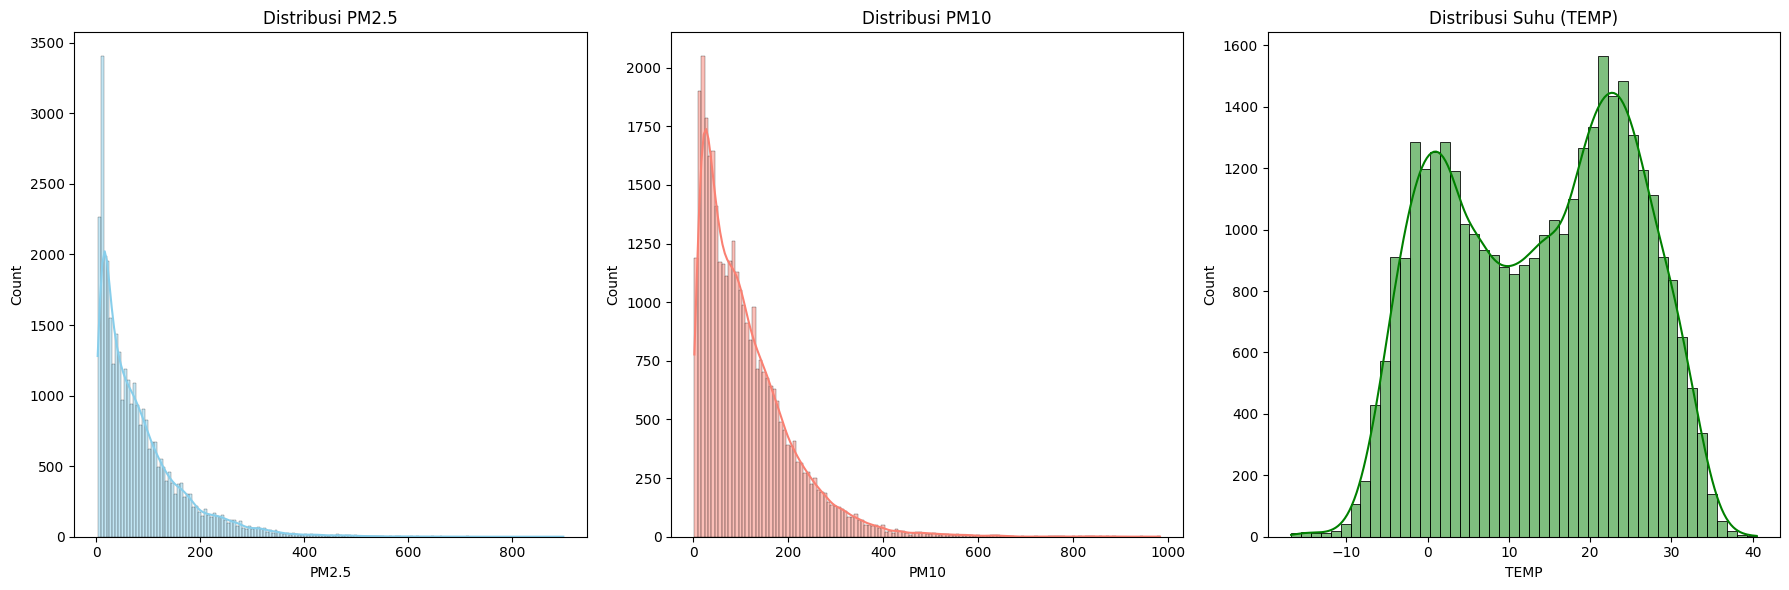

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data_clean['PM2.5'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribusi PM2.5')

sns.histplot(data_clean['PM10'], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Distribusi PM10')

sns.histplot(data_clean['TEMP'], ax=axes[2], kde=True, color='green')
axes[2].set_title('Distribusi Suhu (TEMP)')

plt.tight_layout()

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

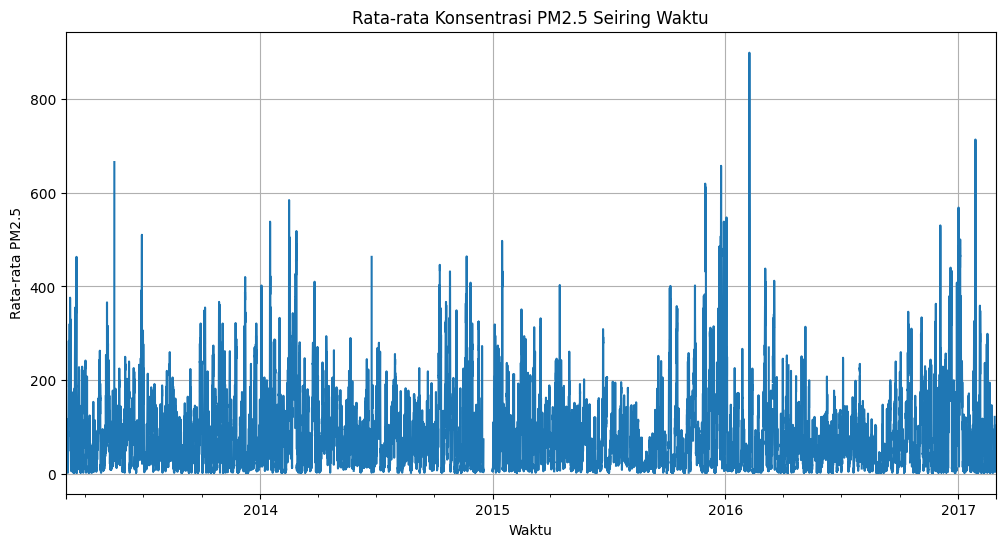

In [75]:
plt.figure(figsize=(12, 6))
data_clean.groupby('datetime')['PM2.5'].mean().plot()
plt.title('Rata-rata Konsentrasi PM2.5 Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

### Pertanyaan 2:

In [76]:
weather_factors = ['TEMP', 'RAIN', 'WSPM', 'PRES', 'DEWP']
correlation_pm2_5_weather = data_clean[weather_factors + ['PM2.5']].corr()

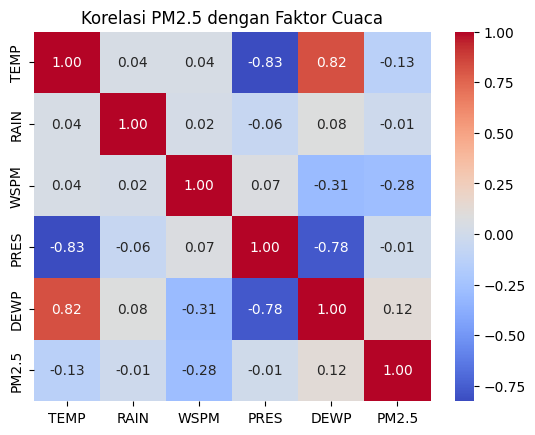

In [77]:
sns.heatmap(correlation_pm2_5_weather, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi PM2.5 dengan Faktor Cuaca')
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Dengan melihat tren PM2.5, kita dapat menarik kesimpulan apakah ada tren peningkatan atau penurunan dalam kualitas udara.
- Dari analisis korelasi, kita dapat menarik kesimpulan faktor cuaca mana yang paling berpengaruh terhadap polusi udara, seperti suhu atau kecepatan angin.